# Model Testing

There are three models for ...

## Data Processing

We'll be using the [NPInter v4.0](http://bigdata.ibp.ac.cn/npinter4) database for RNA-Protein interactions. There were gathered by downloading the [All Interactions](http://bigdata.ibp.ac.cn/npinter4/download/file/interaction_NPInterv4.txt.gz) in NPInter.

In [2]:
import pandas as pd
import requests
from io import BytesIO

import matplotlib.pyplot as plt
import seaborn as sbn; sbn.set_style('ticks')

import torch
from torch import nn

In [3]:
# Get and open NPInter data
url = "http://bigdata.ibp.ac.cn/npinter4/download/file/interaction_NPInterv4.txt.gz"
data = requests.get(url).content

df = pd.read_csv(BytesIO(data), compression='gzip', sep = '\t')

del data

# Filter out non-RPI interactions. 
rpi_expermient = df.level.isin(['RNA-Protein','RNA-TF','lncRNA-TF','ncRNA-TF'])
protein_target = df.tarType == 'protein'
rna_source     = df.ncType  != 'protein'
rpi_binding    = df['class'] == 'binding'

# Filter out RNAs or Proteins with a blank ID
has_rna_id     = df.ncID != '-'
has_protein_id = df.tarID != '-'

# Remove purely in-silico experiments
not_in_silico = ~df.experiment.isin(['Bioinformatics', 'TargetScan and MiRanda prediction algorithms',
                                      'Statistical analysis', 'prediction', 'Statistical analyses',
                                      'statistical analysis', "Correlation and co-expression analysis"])

df = df[rpi_expermient & protein_target & rna_source & rpi_binding # Filter out non-RPI interactions
        & has_rna_id & has_protein_id                              # Filter out RNAs or Proteins with a blank ID
        & not_in_silico]                                           # Remove purely in-silico experiments

print(f"""
There are: {df.shape[0]} interactions
---
""")

df.head()

/home/robertlink/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



There are: 457498 interactions
---



,interID,ncName,ncID,ncType,tarName,tarID,tarType,interDescription,experiment,reference,organism,tissueOrCell,tag,class,level,datasource
0,ncRI-40000001,4.5S,NONOTHNOBEDT000074,lncRNA,rpoD,P0A6M8,protein,"Following translocation, 4.5S RNA replaces 23S...",Immunoprecipitation experiments;EMSA;SDS-polya...,8662727;8107852;1281314,Escherichia coli,-,ncRNA-protein binding,binding,RNA-Protein,Literature mining
1,ncRI-40000002,6S,NONOTHNOBEDT000078,lncRNA,rpoB,M1FYN7,protein,UV crosslinking experiments revealed that 6S R...,cross-linking,10892648,Escherichia coli,-,ncRNA-protein binding,binding,RNA-Protein,Literature mining
2,ncRI-40000003,6S,NONOTHNOBEDT000078,lncRNA,rpoD,P00579,protein,The stable association of sigma70 with core en...,cross-linking,10892648,Escherichia coli,-,ncRNA-protein binding,binding,RNA-Protein,Literature mining
5,ncRI-40000006,7SK,NONHSAG040596,lncRNA,HEXIM1,O94992,protein,Binding of the 7SK snRNA turns the HEXIM1 prot...,Yeast two-hybrid analysis;Immunofluorescence;M...,15201869;15994294;17671421;20675720;20926576;1...,Homo sapiens,-,ncRNA-protein binding,binding,RNA-Protein,Literature mining
7,ncRI-40000008,7SK,NONHSAG040596,lncRNA,Tat,P17735,protein,Tat efficiently replaces HEXIM1 on the 7SK snR...,-,20976203;20471949,Homo sapiens,-,ncRNA-protein binding,binding,RNA-Protein,Literature mining


In [4]:
htop

NameError: name 'htop' is not defined

In [8]:
print(f"There are {len(set(df.tarID))} unique proteins")
print(f"There are {len(set(df.ncID))} unique RNAs")

######################################################
# Next cell is distribution of protein and rna lengths,
# fill in when you acquire this info
######################################################

There are 1005 unique proteins
There are 76226 unique RNAs


In [4]:
# # Protein length distribution for training
# # RNA length distribution for training

# fig, axes = plt.subplots(2,1, figsize = (8,5),
#                          constrained_layout=True)

# axes[0].hist(length_dict['protein'], bins=100,
#              color = 'mediumslateblue',
#              edgecolor='black')
# axes[0].set_title('Training Protein length distribution')
# axes[0].set_ylabel('Frequency')
# axes[0].set_yscale('log')
# axes[0].set_xlabel('Residues')

# axes[1].hist(length_dict['rna'], bins=100,
#              color = 'lightgreen',
#              edgecolor='black')
# axes[1].set_title('Training RNA length distribution')
# axes[1].set_ylabel('Frequency')
# axes[1].set_yscale('log')
# axes[1].set_xlabel('Nucleotides')
# #axes[1].set_ylim(0,10**3+1)

# sbn.despine()

In [11]:
# Count how many times an RPI occurs for each unique RNA and how many times it occures for each protein
# Circos-esque graph

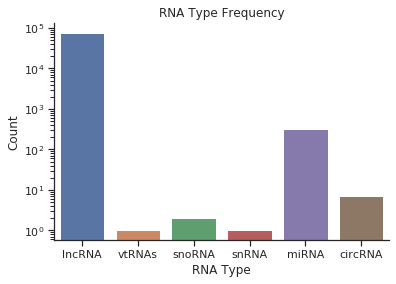

In [17]:
#############################################################
# Frequency of each RNA type
#############################################################

unique_rna_df = df.groupby(['ncID','ncType']).size().reset_index()

sbn.countplot('ncType', data = unique_rna_df)

plt.title("RNA Type Frequency")
plt.yscale('log')
plt.xlabel('RNA Type')
plt.ylabel('Count');

sbn.despine()

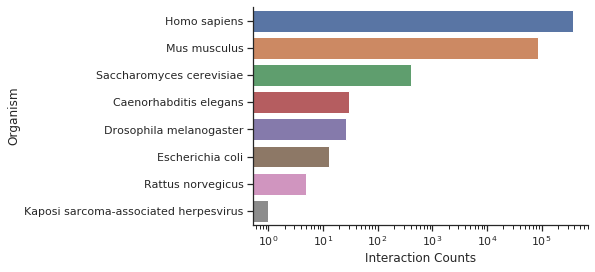

In [19]:
##############################################
# Number of interactions for each organism
##############################################

sbn.countplot(y = 'organism',
              data = df,
              order = df['organism'].value_counts().index,
              dodge = False)

plt.ylabel('Organism')
plt.xlabel('Interaction Counts')
plt.xscale('log')

sbn.despine()

In [20]:
##############################################
# Experiment Type
##############################################

df['experiment'].value_counts()

eCLIP                                                                                                         128022
CLIP-Seq                                                                                                      111568
PAR-CLIP                                                                                                       74695
CLIP                                                                                                           61503
HITS-CLIP                                                                                                      41165
HITS-CLIP;CLIP-Seq                                                                                             18605
eCLIP;CLIP                                                                                                      6100
iCLIP                                                                                                           4704
CLIP;PAR-CLIP                                                   

In [21]:
# Make another plot representing organism cell type if applicable to otganism
# Reduce each category to one cell type
# sbn.countplot(y = 'tissueOrCell',
#               data = df2,
#               order = df2['tissueOrCell'].value_counts().index,
#               dodge = False)

df['tissueOrCell'].value_counts()

HEK293                                                                              70385
HepG2                                                                               52620
K562                                                                                51905
HeLa                                                                                38442
MDA-MB-231                                                                          33982
mouse brain                                                                         30824
human brain                                                                         27927
HepG2;K562                                                                          22627
mouse brain;cerebrums                                                               18035
ESC                                                                                 15818
Flp-In 293                                                                           8552
HEK293T   

## Predict Interactions Using Whole RNA Sequence

There are three models that are predicted using 

|PMID|Title|Model name|Type|
|:--:|:--:|:--:|:--:|
31151273|A Hybrid Prediction Method for Plant lncRNA-Protein Interaction|PLRPIM|Protein and RNA Autoencoders -> LGBM RF|
31890140|Learning distributed representations of RNA and protein sequences and its application for predicting lncRNA-protein interactions|LPI-Pred|Embedding -> RF classifier|
30832218| RPITER: A Hierarchical Deep Learning Framework for ncRNA Protein Interaction Prediction| RPITER| Wide CNN + SAE ensemble -> 2 Dense -> output| 
30813451| BGFE: A Deep Learning Model for ncRNA-Protein Interaction Predictions Based on Improved Sequence Information | BGFE | Protein and RNA SAEs -> RF|
30321541 | Prediction of RNA-protein interactions by combining deep convolutional neural network with feature selection ensemble method | RPIFSE | Deeper CNN -> dense -> output ->  ELM|
27506469| IPMiner: hidden ncRNA-protein interaction sequential pattern mining with stacked autoencoder for accurate computational prediction | IPMiner | SAE -> RF -> Log. Regression |
29858068 | A Deep Learning Framework for Robust and Accurate Prediction of ncRNA-Protein Interactions Using Evolutionary Information | RPI-SAN | SAE -> RF |

These tools are also compared using three precurated datasets frequently used for comparison:

| Dataset | Positive IDs | Negative IDs | RNAs | Proteins | Organisms | Ref |
-------|----|------|----|-------|----|---
RPI1807 | 1807 | 1436 | 1078 | 3131 | X | [[3]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4330382/pdf/gkv020.pdf) |
RPI2241 | 2241 | 2241 | 841 | 2042 | X | [[1]](https://bmcbioinformatics.biomedcentral.com/track/pdf/10.1186/1471-2105-12-489) |
